In [33]:
# Install the requirements

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 

# Gaussian Distribution of sum of samples

In [57]:
X = 10 # number of distributions
Y = 10000 # number of samples from each single distribution

distributions = []

for i in range(X):
    random_seed = np.random.randint(0,100)
    np.random.seed( random_seed )#int(time.time()))
    random_gen_values = (np.random.uniform(low=0, high=1, size=Y).tolist())

    distributions.append(random_gen_values)



In [58]:
distributions

[[0.29624916167243354,
  0.8090677156733267,
  0.35025252522341144,
  0.7894092564308925,
  0.5613489757705725,
  0.25358895422013317,
  0.10497708368510905,
  0.058460729196879724,
  0.6732923807698442,
  0.6978296570017101,
  0.7327832059516539,
  0.7878740584977104,
  0.07637632039359277,
  0.3176805966199643,
  0.7410232771836268,
  0.328494229175048,
  0.47014548492004427,
  0.1810857177346843,
  0.3235044018091007,
  0.45490615596698825,
  0.5296305154817527,
  0.2930305486524848,
  0.27697514788018085,
  0.6781530719749497,
  0.233458700605652,
  0.6772553697317375,
  0.43233249756682635,
  0.38766628526578384,
  0.33544620663849345,
  0.5132221243123415,
  0.9876911143597368,
  0.5309143712841541,
  0.6804361576402314,
  0.39113473324146986,
  0.11655619545171181,
  0.70722572636939,
  0.4136160945599694,
  0.4560330320768555,
  0.33195253580190287,
  0.0937152433162668,
  0.4577166960483934,
  0.8057929087049822,
  0.19350921158975343,
  0.46502849139064684,
  0.19091752157285

In [59]:

# random samples of Y size from all X no.of distributions
all_data = pd.DataFrame(distributions).T
all_data.columns = [f'Distri_{x}' for x in range(1,X+1)]

melt_df = pd.melt(all_data, var_name='distributions', value_name='random_value')
melt_df

,distributions,random_value
0,Distri_1,0.296249
1,Distri_1,0.809068
2,Distri_1,0.350253
3,Distri_1,0.789409
4,Distri_1,0.561349
...,...,...
99995,Distri_10,0.339837
99996,Distri_10,0.484299
99997,Distri_10,0.860292
99998,Distri_10,0.036281


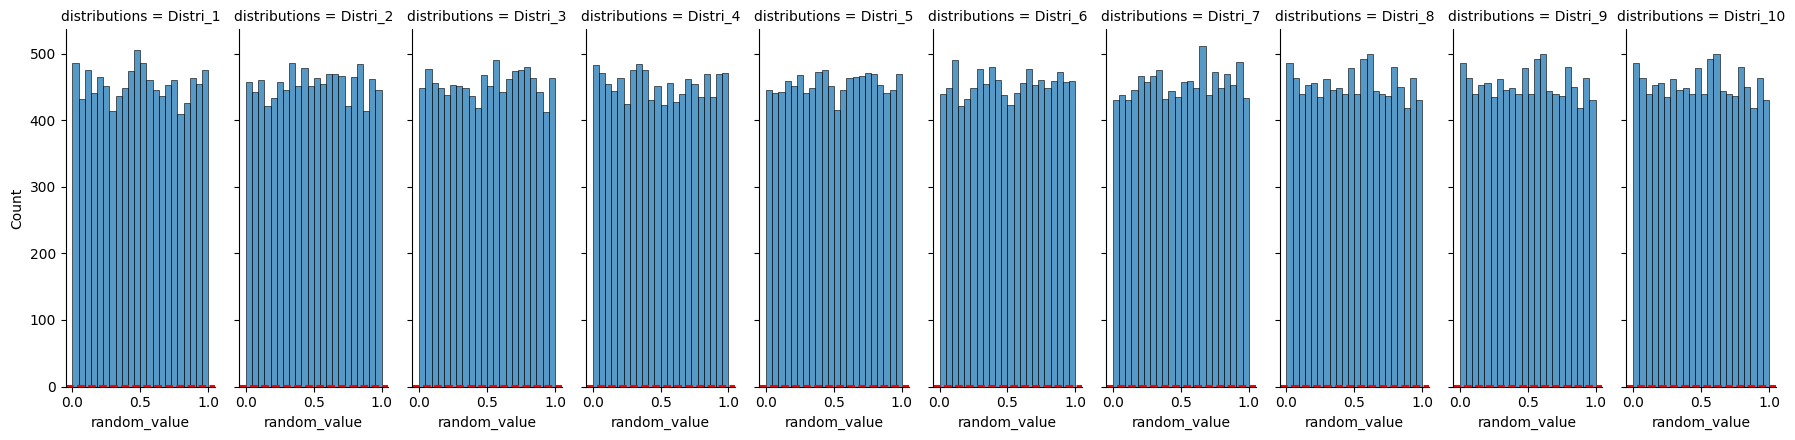

In [60]:
# Distribution of X individual distributions
g = sns.FacetGrid(melt_df,col='distributions', height=4.5, aspect=.4)
g.map(sns.histplot,'random_value')
g.refline(y=melt_df['random_value'].mean(),color='r')

In [61]:

# columns  is no.of different distributions of same type and  index are the random values generated from the distribution

# Row wise sum of all the distribution random values
all_data['row_sum'] = all_data.sum(axis=1)
all_data#.T.reset_index()

,Distri_1,Distri_2,Distri_3,Distri_4,Distri_5,Distri_6,Distri_7,Distri_8,Distri_9,Distri_10,row_sum
0,0.296249,0.093108,0.154288,0.960017,0.221993,0.017490,0.494602,0.783832,0.783832,0.783832,4.589244
1,0.809068,0.971656,0.133700,0.699512,0.870732,0.891573,0.228083,0.634834,0.634834,0.634834,6.508825
2,0.350253,0.483860,0.362685,0.999867,0.206719,0.284861,0.255474,0.249043,0.249043,0.249043,3.690849
3,0.789409,0.242523,0.679109,0.220067,0.918611,0.298976,0.396330,0.758076,0.758076,0.758076,5.819253
4,0.561349,0.531124,0.194450,0.361056,0.488411,0.792034,0.377315,0.313077,0.313077,0.313077,4.244971
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.875285,0.946747,0.114488,0.085141,0.823427,0.676493,0.235949,0.339837,0.339837,0.339837,4.777041
9996,0.618488,0.691167,0.779295,0.598162,0.282336,0.778472,0.082135,0.484299,0.484299,0.484299,5.282953
9997,0.395440,0.580327,0.404829,0.204652,0.448515,0.092085,0.560550,0.860292,0.860292,0.860292,5.267275
9998,0.285695,0.103894,0.591621,0.054576,0.309193,0.403537,0.540808,0.036281,0.036281,0.036281,2.398168


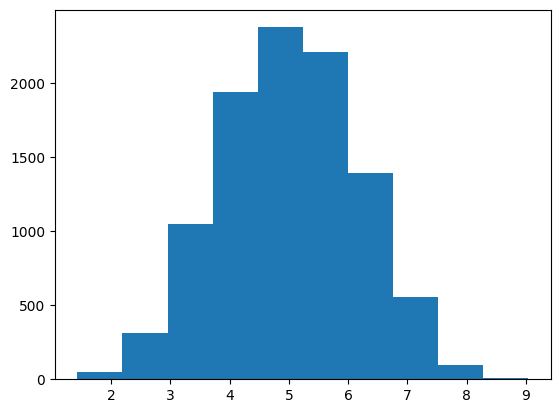

In [62]:
plt.hist(all_data['row_sum'])
plt.show()

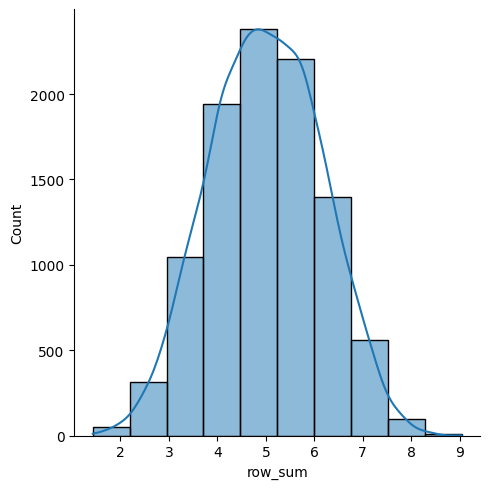

In [63]:
sns.displot(all_data['row_sum'], kde=True, bins=10)
plt.show()

# Task 2

Check for actual distributions mean present in the confidence interval of random samples mean taken from the same distributions

In [64]:
X = 200 # number of distributions
Y = 10000 # number of samples from each single distribution
subset_len = 10 


distributions = []

random_gen_values = (np.random.uniform(low=0, high=1, size=Y).tolist())

for i in range(X):
    # random_seed = np.random.randint(0,100)
    # np.random.seed( random_seed )#int(time.time()))
    
    subset = np.random.choice(random_gen_values, subset_len)

    distributions.append(subset.tolist())
    
df = pd.DataFrame(distributions)
len(subset)

10

In [65]:
new_df = df.copy()
new_df['rows_sum'] = new_df.sum(axis=1)

new_df['actual_mean'] = 0.5

new_df['min_sigma'] = new_df['rows_sum']  - 1/np.sqrt(12) 

new_df['max_sigma'] = new_df['rows_sum'] + 1/np.sqrt(12)

new_df

# np.mean(random_gen_values)

,0,1,2,3,4,5,6,7,8,9,rows_sum,actual_mean,min_sigma,max_sigma
0,0.230511,0.094518,0.528767,0.195417,0.699694,0.682490,0.325718,0.789237,0.850607,0.358908,4.755867,0.5,4.467192,5.044542
1,0.050689,0.380923,0.115552,0.886052,0.832560,0.230872,0.179338,0.966807,0.474986,0.433576,4.551354,0.5,4.262679,4.840030
2,0.417705,0.177072,0.397852,0.542627,0.231139,0.991274,0.227796,0.513439,0.584427,0.023198,4.106529,0.5,3.817853,4.395204
3,0.679355,0.711780,0.178317,0.279955,0.935596,0.955785,0.904610,0.131301,0.912662,0.530631,6.219991,0.5,5.931316,6.508666
4,0.930470,0.891272,0.373983,0.573404,0.620456,0.756022,0.581782,0.243099,0.327810,0.942291,6.240589,0.5,5.951914,6.529264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.683845,0.966946,0.588277,0.123482,0.348322,0.704652,0.059806,0.675293,0.754307,0.611736,5.516665,0.5,5.227990,5.805340
196,0.198780,0.955142,0.555169,0.045612,0.673065,0.221930,0.922651,0.830850,0.466214,0.166663,5.036076,0.5,4.747401,5.324751
197,0.307775,0.620581,0.232120,0.740086,0.670976,0.526015,0.850474,0.459605,0.654446,0.663811,5.725890,0.5,5.437215,6.014565
198,0.773471,0.069693,0.995379,0.212712,0.218991,0.994263,0.469468,0.640621,0.517796,0.189999,5.082394,0.5,4.793718,5.371069
